In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [9]:

# Load sample dataset
data = pd.read_csv('/heart.csv')

Accuracy with PCA features: 0.9707317073170731
Accuracy with selected features: 0.9707317073170731


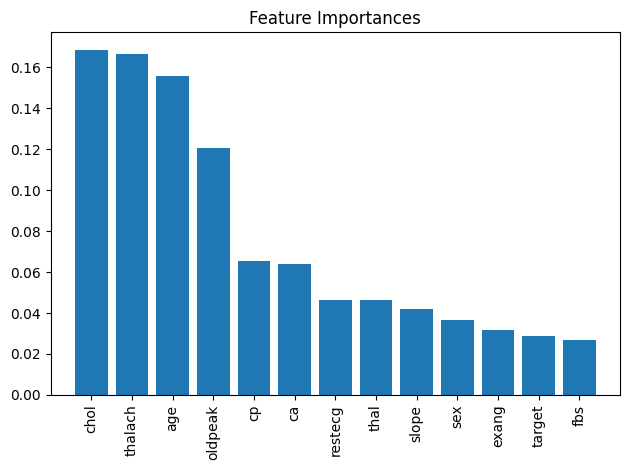

In [10]:

X = data.drop('trestbps', axis=1)
y = data['trestbps']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a Random Forest model and evaluate performance with PCA features
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA features:", accuracy_pca)

# Use feature importance for feature selection
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Select features based on importance
selector = SelectFromModel(rf, threshold='median')  # Select features with importance above median
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train a Random Forest model and evaluate performance with selected features
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)

# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


In [11]:
#Compare performances
print(f'Accuracy with original features: {accuracy_score(y_test, rf.predict(X_test)):.4f}')
print(f'Accuracy with PCA features: {accuracy_pca:.4f}')
print(f'Accuracy with selected features: {accuracy_selected:.4f}')


Accuracy with original features: 0.1024
Accuracy with PCA features: 0.9707
Accuracy with selected features: 0.9707


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
